## Trabalho Final - Módulo 6
### Uma solução de machine learning utilizando ferramentas de big data

ALUNA: Bruna Subtil Lima
 
 Este projeto tem como objetivo a prática dos principais conceitos vistos em sala de aula em uma aplicação de data science
* Escolha uma base de dados (externa ou disponível no databricks-datasets) --> ok
* Descreva a base de dados e onde está inserida no seu cluster --> ok
* Foi necessário uso do DBFS? Porque e com quais objetivos? --> ok
* Leitura da base de dados no Spark. Você utilizou o spark SQL, RDD ou dataframe? --> ok
* Realize os préprocessamentos necessários na base para utilização de um algoritmo de machine learning. Cite os pre processamentos realizados e porque foram escolhidos dessa forma
OBS. Maior quantidade de pré-processamentos possíveis diretamente no spark ao invés do pandas --> ok
* Realize análise exploratória simples utilizando o matplotlib ou o seaborn --> ok
* Escolha um algorimto de machine learning e realize o treinamento e teste do modelo, ilustrando o desempenho e diagnóstico do modelo --> ok

###DBFS
Utilizando o DBFS para encontrar a base de dados interna que vai ser utilizada. 

Caso a base fosse externa, ela também seria carregada nessas pastas e seria necessário utilizar o DBFS para extraí-la da memória.

In [0]:
dbutils.fs.ls('/databricks-datasets/')

Out[196]: [FileInfo(path='dbfs:/databricks-datasets/', name='databricks-datasets/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/COVID/', name='COVID/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/README.md', name='README.md', size=976, modificationTime=1532468253000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/', name='Rdatasets/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/SPARK_README.md', name='SPARK_README.md', size=3359, modificationTime=1455043490000),
 FileInfo(path='dbfs:/databricks-datasets/adult/', name='adult/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/airlines/', name='airlines/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/amazon/', name='amazon/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/asa/', name='asa/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/atlas_higgs/', name=

In [0]:
dbutils.fs.ls('/databricks-datasets/Rdatasets/data-001/csv')

Out[197]: [FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/COUNT/', name='COUNT/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/Ecdat/', name='Ecdat/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/HSAUR/', name='HSAUR/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/HistData/', name='HistData/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/KMsurv/', name='KMsurv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/MASS/', name='MASS/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/Zelig/', name='Zelig/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/boot/', name='boot/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/

In [0]:
dbutils.fs.ls('/databricks-datasets/Rdatasets/data-001/csv/ggplot2/')

Out[198]: [FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv', name='diamonds.csv', size=3192560, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/economics.csv', name='economics.csv', size=20731, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/midwest.csv', name='midwest.csv', size=100539, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/movies.csv', name='movies.csv', size=6000709, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/mpg.csv', name='mpg.csv', size=17345, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/msleep.csv', name='msleep.csv', size=7182, modificationTime=1416619980000),
 FileInfo(path='dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/preside

### Dataset

O dataset escolhido foi o de diamantes que se encontra no caminho: *dbfs:/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv*

**Prices of over 50,000 round cut diamonds**

A dataset containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

#### Format

A data frame with 53940 rows and 10 variables:

- price: price in US dollars (\$326--\$18,823)

- carat: weight of the diamond (0.2--5.01)

- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color: diamond colour, from D (best) to J (worst)

- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: length in mm (0--10.74)

- y: width in mm (0--58.9)

- z: depth in mm (0--31.8)

- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table: width of top of diamond relative to widest point (43--95)

Fonte: https://ggplot2.tidyverse.org/reference/diamonds.html

#### Os 4Cs
Cada diamante, como as digitais, tem certas características distintas. 
Os 4Cs – cor (“color”), pureza (“clarity”), lapidação (“cut”) e peso em quilates (“carat weight”) – são padrões globalmente aceitos para avaliar a qualidade de um diamante.

Fonte: https://www.tiffany.com.br/engagement/the-tiffany-guide-to-diamonds/

### O que é a cor do diamante?
Cor refere-se ao tom natural inerente aos diamantes incolores. Na natureza, a maioria dos diamantes incolores tem tonalidade amarela. Quanto menos cor o diamante tiver, mais raro ele será. O padrão da indústria para classificar a cor é avaliar cada pedra ao lado de um conjunto de “pedras mestras” com iluminação específica e designar uma classificação entre as letras “D” (incolor) a “Z” (amarelo-claro).

![](https://media.tiffany.com/is/image/tiffanydm/GuideToDiamonds_Color_Update_Desktop?$tile$&wid=1440&hei=912&fmt=webp)

### O que é o quilate do diamante?
Quilate refere-se ao peso do diamante, não ao tamanho. A Tiffany mede os diamantes a 1/1000º de um quilate; um quilate equivale a 0,20 gramas.
![](https://media.tiffany.com/is/image/tiffanydm/GTD_Carat_CaratChart_Desktop?$tile$&wid=1440&hei=912&fmt=webp)

### O que é a lapidação do diamante?
O mais importante dos 4Cs, a lapidação (“cut”) se refere à forma como as facetas do diamante interagem com a luz. Ela é determinada por simetria, proporção e polimento. Mais do que qualquer outro fator, a lapidação determina a beleza da pedra.
![](https://media.tiffany.com/is/image/tiffanydm/GTD_Cut_DiamondCutChartv2_Desktop?$tile$&wid=1440&hei=912&fmt=webp)

### O que é a pureza do diamante?
A pureza do diamante é uma medida de características naturais e da raridade da pedra, classificada pela visibilidade dessas características com uma ampliação de dez vezes. Uma pedra é avaliada como pura se, sob uma ampliação de dez vezes, nenhuma inclusão (impureza interna) e nenhuma mancha (impureza externa) forem visíveis. 
![](https://media.tiffany.com/is/image/tiffanydm/GTD_Clarity_ClarityChartv3_Desktop?$tile$&wid=1440&hei=912&fmt=webp)

In [0]:
dbutils.fs.ls('/')

Out[199]: [FileInfo(path='dbfs:/Projetoletscode/', name='Projetoletscode/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-datasets/', name='databricks-datasets/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/databricks-results/', name='databricks-results/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/', name='tmp/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/user/', name='user/', size=0, modificationTime=0)]

In [0]:
### Criando pasta
dbutils.fs.mkdirs('Projetoletscode')

Out[200]: True

In [0]:
#Copiando o arquivo csv para a pasta do projeto
dbutils.fs.cp('/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv','/Projetoletscode')

Out[201]: True

In [0]:
dbutils.fs.ls('/Projetoletscode')

Out[202]: [FileInfo(path='dbfs:/Projetoletscode/diamonds.csv', name='diamonds.csv', size=3192560, modificationTime=1654567786000),
 FileInfo(path='dbfs:/Projetoletscode/diamonds_treated.csv/', name='diamonds_treated.csv/', size=0, modificationTime=0)]

In [0]:
dbutils.fs.head('/Projetoletscode/diamonds.csv')

[Truncated to first 65536 bytes]
Out[203]: '"","carat","cut","color","clarity","depth","table","price","x","y","z"\n"1",0.23,"Ideal","E","SI2",61.5,55,326,3.95,3.98,2.43\n"2",0.21,"Premium","E","SI1",59.8,61,326,3.89,3.84,2.31\n"3",0.23,"Good","E","VS1",56.9,65,327,4.05,4.07,2.31\n"4",0.29,"Premium","I","VS2",62.4,58,334,4.2,4.23,2.63\n"5",0.31,"Good","J","SI2",63.3,58,335,4.34,4.35,2.75\n"6",0.24,"Very Good","J","VVS2",62.8,57,336,3.94,3.96,2.48\n"7",0.24,"Very Good","I","VVS1",62.3,57,336,3.95,3.98,2.47\n"8",0.26,"Very Good","H","SI1",61.9,55,337,4.07,4.11,2.53\n"9",0.22,"Fair","E","VS2",65.1,61,337,3.87,3.78,2.49\n"10",0.23,"Very Good","H","VS1",59.4,61,338,4,4.05,2.39\n"11",0.3,"Good","J","SI1",64,55,339,4.25,4.28,2.73\n"12",0.23,"Ideal","J","VS1",62.8,56,340,3.93,3.9,2.46\n"13",0.22,"Premium","F","SI1",60.4,61,342,3.88,3.84,2.33\n"14",0.31,"Ideal","J","SI2",62.2,54,344,4.35,4.37,2.71\n"15",0.2,"Premium","E","SI2",60.2,62,345,3.79,3.75,2.27\n"16",0.32,"Premium","E","I1",60.9,58,345

In [0]:
#criando um dataframe com a cópia da tabela diamonds.csv
diamonds = (spark.read
  .format("csv")
  .option("header", "true")
  .option("inferSchema", "true")
  .load("/Projetoletscode/diamonds.csv")
)

Para fazer a leitura do dataset escolhido foi utilizado o **Spark - Data Frame**, por se tratar de um banco de dados relacional é uma das formas mais eficientes computacionalmene para processar esse tipo de dado.

In [0]:
diamonds.head()

Out[205]: Row(_c0=1, carat=0.23, cut='Ideal', color='E', clarity='SI2', depth=61.5, table=55.0, price=326, x=3.95, y=3.98, z=2.43)

In [0]:
diamonds.show()

+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
|  7| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
|  8| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
|  9| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 10| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
| 11|  0.3|     Good|    J|    SI1| 64.0| 55.0|  339|4.25|4.28|2.73|
| 12| 0.23|    Ideal|    J|    VS1

In [0]:
#Outra forma de visualizar
display(diamonds)

_c0,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39


In [0]:
diamonds.dtypes

Out[208]: [('_c0', 'int'),
 ('carat', 'double'),
 ('cut', 'string'),
 ('color', 'string'),
 ('clarity', 'string'),
 ('depth', 'double'),
 ('table', 'double'),
 ('price', 'int'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

Ou seja, as varáveis estão divididas em: 
- Categóricas: cut, color, clarity

- Numericas: carat, depth, table, x, y, z, price(nosso target)

In [0]:
diamonds.count()

Out[209]: 53940

In [0]:
diamonds.count(), len(diamonds.columns)

Out[210]: (53940, 11)

In [0]:
diamonds.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



###Processamento dos Dados

In [0]:
#Verificando os valores nulos 
#(Fonte: https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe)
nulos = {col:diamonds.filter(diamonds[col].isNull()).count() for col in diamonds.columns}
nulos

Out[212]: {'_c0': 0,
 'carat': 0,
 'cut': 0,
 'color': 0,
 'clarity': 0,
 'depth': 0,
 'table': 0,
 'price': 0,
 'x': 0,
 'y': 0,
 'z': 0}

In [0]:
#segunda alternativa (fonte: https://sparkbyexamples.com/pyspark/pyspark-find-count-of-null-none-nan-values/)
from pyspark.sql.functions import col,isnan, when, count
diamonds.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in diamonds.columns]).show()

+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|_c0|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|  0|    0|  0|    0|      0|    0|    0|    0|  0|  0|  0|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+



Ou seja, não há valores nulos na base de dados.

Porém a primeira coluna aparenta ser somente uma coluna de índice, ou seja, podemos removê-la, pois não irá ajudar no processo de ML.

In [0]:
# Retirando a primeira coluna 
# (Fonte: https://sparkbyexamples.com/spark/spark-drop-column-from-dataframe-dataset/)
diam=diamonds.drop(col("_c0"))
diam.printSchema()

root
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



In [0]:
diam.summary().show() 
#The difference is that df.summary() returns the same information as df.describe() plus quartile information (25%, 50% and 75%).
#Fonte: https://stackoverflow.com/questions/55938112/describe-a-dataframe-on-pyspark

+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|             carat|      cut|color|clarity|             depth|             table|            price|                 x|                 y|                 z|
+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|             53940|    53940|53940|  53940|             53940|             53940|            53940|             53940|             53940|             53940|
|   mean|0.7979397478679852|     null| null|   null| 61.74940489432624| 57.45718390804603|3932.799721913237| 5.731157211716609| 5.734525954764462|3.5387337782723316|
| stddev|0.4740112444054196|     null| null|   null|1.4326213188336525|2.2344905628213247|3989.439738146397|1.1217607467924915|1.1421346741235616|0.7056988469499883|
|   

In [0]:
diam.describe().show()

+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|             carat|      cut|color|clarity|             depth|             table|            price|                 x|                 y|                 z|
+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|             53940|    53940|53940|  53940|             53940|             53940|            53940|             53940|             53940|             53940|
|   mean|0.7979397478679852|     null| null|   null| 61.74940489432624| 57.45718390804603|3932.799721913237| 5.731157211716609| 5.734525954764462|3.5387337782723316|
| stddev|0.4740112444054196|     null| null|   null|1.4326213188336525|2.2344905628213247|3989.439738146397|1.1217607467924915|1.1421346741235616|0.7056988469499883|
|   

Observando os quadros acima é possível perceber que há valores mínimos de x, y e z que são iguais a zero. Por se tratarem de medidas de comprimento, largura e profundidade de um diamante, não faz sentido que algum desses valores seja nulo.

In [0]:
diam.filter((diam['x']==0) | (diam['y']==0) | (diam['z']==0)).show() 

+-----+---------+-----+-------+-----+-----+-----+----+----+---+
|carat|      cut|color|clarity|depth|table|price|   x|   y|  z|
+-----+---------+-----+-------+-----+-----+-----+----+----+---+
|  1.0|  Premium|    G|    SI2| 59.1| 59.0| 3142|6.55|6.48|0.0|
| 1.01|  Premium|    H|     I1| 58.1| 59.0| 3167|6.66| 6.6|0.0|
|  1.1|  Premium|    G|    SI2| 63.0| 59.0| 3696| 6.5|6.47|0.0|
| 1.01|  Premium|    F|    SI2| 59.2| 58.0| 3837| 6.5|6.47|0.0|
|  1.5|     Good|    G|     I1| 64.0| 61.0| 4731|7.15|7.04|0.0|
| 1.07|    Ideal|    F|    SI2| 61.6| 56.0| 4954| 0.0|6.62|0.0|
|  1.0|Very Good|    H|    VS2| 63.3| 53.0| 5139| 0.0| 0.0|0.0|
| 1.15|    Ideal|    G|    VS2| 59.2| 56.0| 5564|6.88|6.83|0.0|
| 1.14|     Fair|    G|    VS1| 57.5| 67.0| 6381| 0.0| 0.0|0.0|
| 2.18|  Premium|    H|    SI2| 59.4| 61.0|12631|8.49|8.45|0.0|
| 1.56|    Ideal|    G|    VS2| 62.2| 54.0|12800| 0.0| 0.0|0.0|
| 2.25|  Premium|    I|    SI1| 61.3| 58.0|15397|8.52|8.42|0.0|
|  1.2|  Premium|    D|   VVS1| 62.1| 59

In [0]:
diam.filter((diam['x']==0) | (diam['y']==0) | (diam['z']==0)).count()

Out[218]: 20

Como as linhas que possuem os valores nulos de x, y e z são somente um fração pequena do total de dados no dataframe, optei por excluir essas linhas.

In [0]:
#Dropando as linhas com valores de x ou y ou z nulos 
diam2 = diam.filter((diam['x']!=0) & (diam['y']!=0) & (diam['z']!=0))
diam2.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows



In [0]:
diam2.count(), len(diamonds.columns)

Out[220]: (53920, 11)

In [0]:
#Passando para o Pandas para poder utilizar o matplotlib e o seaborn
diam_df=diam2.toPandas()
diam_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [0]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [0]:
#Fiz o pairplot somente uma vez, pois o dataset não era tão grande. Em caso de bigdata creio que não faria. 
#Encontra-se anexo na pasta do github desse projeto.
#pplot = ax = sns.pairplot(diam_df, hue= "cut")

![](https://github.com/bsubtillima/LetsCode-SantanderCoders-DS/blob/main/Modulo06/pairplot.png?raw=true)

Out[224]: <AxesSubplot:>

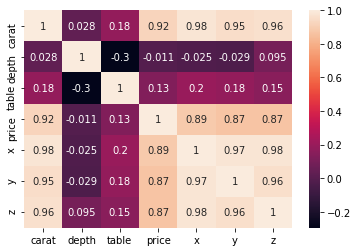

In [0]:
corr = diam_df.corr()
sns.heatmap(data=corr, annot=True)

Observações: 

- Tanto pelo pairplot quanto pelo heatmap com correlação de Pearson, é possível observar que as features x, y e z possuem correlação alta entre elas (avaliar a possibilidade de excluir duas delas ou unificar em uma única coluna).
- O preço do diamente está bastante correlacionado com as dimensões e o quilate dele. 
- Os outros parâmetros possuem baixa correlação com o preço, mas preferi mantê-las nesse primeiro momento. 
- Pelo pairplot foi possível observar alguns outliers nos gráficos formados entre os parâmetros das dimensões, principalmente os que tem como um dos eixos as dimensões y e z.

In [0]:
#Fazendo análise nas variáveis categóricas 

#Plotando as frequências (peguei de um notebook do kaggle do Titanic, não lembro a referência. Ver meu notebook)
def bar_plot(variable):
    # get feature
    var = diam_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [0]:
cat = ['cut', 'color', 'clarity']

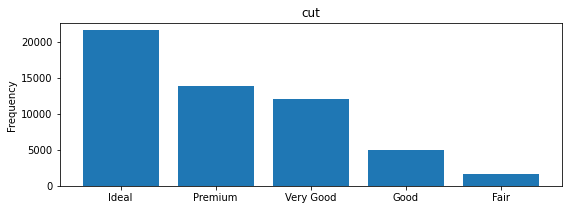

cut:
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


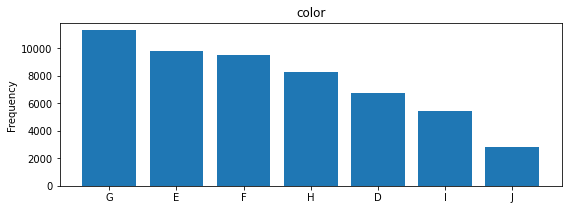

color:
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


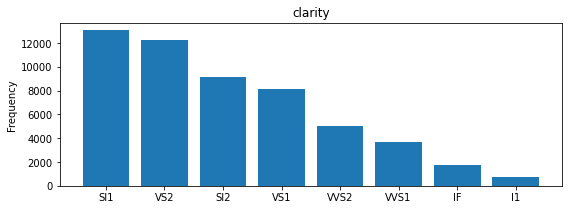

clarity:
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


In [0]:
for c in cat:
    bar_plot(c)

Out[228]: Text(0.5, 0, 'Cut')

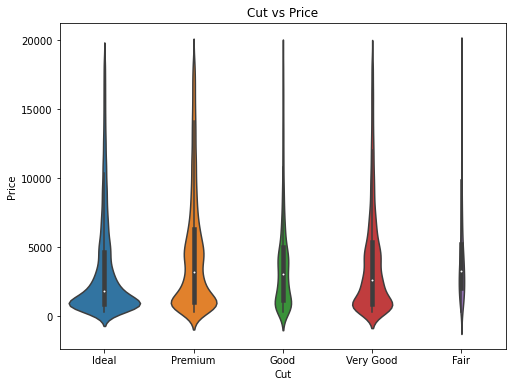

In [0]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x="cut",y="price", data=diam_df,scale= "count")
ax.set_title("Cut vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

Out[229]: Text(0.5, 0, 'Color')

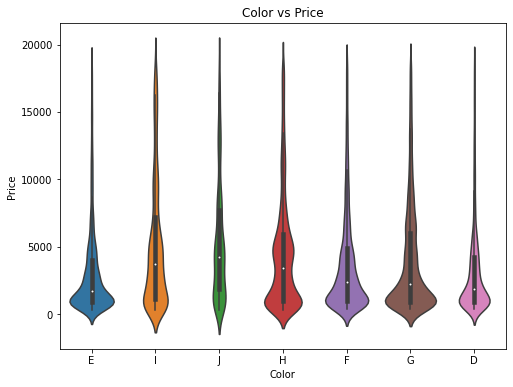

In [0]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x="color",y="price", data=diam_df,scale= "count")
ax.set_title("Color vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")

Out[230]: Text(0.5, 0, 'Clarity')

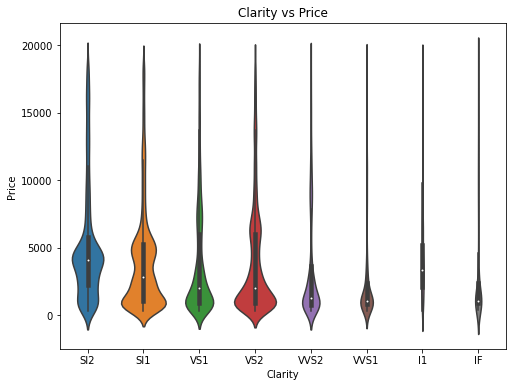

In [0]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x="clarity",y="price", data=diam_df,scale= "count")
ax.set_title("Clarity vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")

- Decidi criar uma feature combinando as três medidas de dimensão. Apesar do diamante não ser de formato de paralelepipedo, usarei a multiplicação das três dimensões para representar o volume aproximado das pedras.
- Além disso, optei nesse momento inicial não retirar os outliers ara o treinamento do modelo.

In [0]:
#equivalente: diam2['volume'] = diam2['x']*diam2['y']*diam2['z']
diam2 = diam2.withColumn("Volume",(diam2.x*diam2.y*diam2.z) )
diam2.show()

+-----+---------+-----+-------+-----+-----+-----+----+----+----+------------------+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|            Volume|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+------------------+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|          38.20203|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|         34.505856|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|         38.076885|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|          46.72458|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|51.917249999999996|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|38.693951999999996|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|38.830870000000004|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|         42.321081|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|36.425214000

In [0]:
#Tentei utilizar essa forma de OHE e algumas variações dela, mas não deu certo. 
#Apresenta o seuinte erro: IllegalArgumentException: requirement failed: Column cut must be of type numeric but was actually of type string.
#Deixei no notebook só pra deixar na lembrança que não funciona. 
#from pyspark.ml.feature import OneHotEncoder
#encoder = OneHotEncoder(inputCols=['cut','color','clarity'],
#                       outputCols=["cut_vec", "color_vec","clarity_vec"])
#model = encoder.fit(diam2)
#encoded = model.transform(diam2)
#encoded.show()

#Fontes: 
# https://stackoverflow.com/questions/30580410/how-to-do-labelencoding-or-categorical-value-in-apache-spark
# https://stackoverflow.com/questions/34167105/using-spark-mls-onehotencoder-on-multiple-columns


In [0]:
#Gerando dummies
#Fonte: https://towardsdev.com/how-to-write-pyspark-one-hot-encoding-results-to-an-interpretable-csv-file-626ecb973962

from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType

#Dummies para coluna cut
distinct_values = diam2.select("cut")\
                    .distinct()\
                    .rdd\
                    .flatMap(lambda x: x).collect()

for value in distinct_values:
    function = udf(lambda item: 
                   1 if item == value else 0, 
                   IntegerType())
    new_column_name = "cut"+'_'+value
    diam2 = diam2.withColumn(new_column_name, function(col("cut")))
    
display(diam2)

carat,cut,color,clarity,depth,table,price,x,y,z,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20203,0,1,0,0,0
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1,0,0,0,0
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,0,1,0,0
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63,46.72458,1,0,0,0,0
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917249999999996,0,0,1,0,0
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693951999999996,0,0,0,0,1
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870000000004,0,0,0,0,1
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,0,0,0,0,1
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214000000004,0,0,0,1,0
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39,38.718,0,0,0,0,1


In [0]:
#Dummies para a coluna color
distinct_values = diam2.select("color")\
                    .distinct()\
                    .rdd\
                    .flatMap(lambda x: x).collect()

for value in distinct_values:
    function = udf(lambda item: 
                   1 if item == value else 0, 
                   IntegerType())
    new_column_name = "color"+'_'+value
    diam2 = diam2.withColumn(new_column_name, function(col("color")))
    
display(diam2)

carat,cut,color,clarity,depth,table,price,x,y,z,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good,color_F,color_E,color_D,color_J,color_G,color_I,color_H
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20203,0,1,0,0,0,0,1,0,0,0,0,0
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1,0,0,0,0,0,1,0,0,0,0,0
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,0,1,0,0,0,1,0,0,0,0,0
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63,46.72458,1,0,0,0,0,0,0,0,0,0,1,0
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917249999999996,0,0,1,0,0,0,0,0,1,0,0,0
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693951999999996,0,0,0,0,1,0,0,0,1,0,0,0
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870000000004,0,0,0,0,1,0,0,0,0,0,1,0
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,0,0,0,0,1,0,0,0,0,0,0,1
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214000000004,0,0,0,1,0,0,1,0,0,0,0,0
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39,38.718,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
#Dummies para a coluna clarity
distinct_values = diam2.select("clarity")\
                    .distinct()\
                    .rdd\
                    .flatMap(lambda x: x).collect()

for value in distinct_values:
    function = udf(lambda item: 
                   1 if item == value else 0, 
                   IntegerType())
    new_column_name = "clarity"+'_'+value
    diam2 = diam2.withColumn(new_column_name, function(col("clarity")))
    
display(diam2)

carat,cut,color,clarity,depth,table,price,x,y,z,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good,color_F,color_E,color_D,color_J,color_G,color_I,color_H,clarity_VVS2,clarity_SI1,clarity_IF,clarity_I1,clarity_VVS1,clarity_VS2,clarity_SI2,clarity_VS1
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20203,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63,46.72458,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917249999999996,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693951999999996,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870000000004,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214000000004,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39,38.718,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [0]:
diam2.printSchema()

root
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- cut_Premium: integer (nullable = true)
 |-- cut_Ideal: integer (nullable = true)
 |-- cut_Good: integer (nullable = true)
 |-- cut_Fair: integer (nullable = true)
 |-- cut_Very Good: integer (nullable = true)
 |-- color_F: integer (nullable = true)
 |-- color_E: integer (nullable = true)
 |-- color_D: integer (nullable = true)
 |-- color_J: integer (nullable = true)
 |-- color_G: integer (nullable = true)
 |-- color_I: integer (nullable = true)
 |-- color_H: integer (nullable = true)
 |-- clarity_VVS2: integer (nullable = true)
 |-- clarity_SI1: integer (nullable = true)
 |-- clarity_IF

In [0]:
#Transformando as colunas tipo double em inteiros (evitar erros nas funções de ML do spark)
from pyspark.sql.types import IntegerType

col = ['carat', 'depth', 'table', 'price', 'Volume']

for i in col:
    diam2= diam2.withColumn(i, diam2[i].cast(IntegerType()))

In [0]:
# Deletando as colunas que foram transaformadas em dummies e as de dimensões (pois vamos usar o volume)
col_drop = ('x', 'y','z','cut','color','clarity')
diam2 = diam2.drop(*col_drop)

diam2.printSchema()

root
 |-- carat: integer (nullable = true)
 |-- depth: integer (nullable = true)
 |-- table: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- cut_Premium: integer (nullable = true)
 |-- cut_Ideal: integer (nullable = true)
 |-- cut_Good: integer (nullable = true)
 |-- cut_Fair: integer (nullable = true)
 |-- cut_Very Good: integer (nullable = true)
 |-- color_F: integer (nullable = true)
 |-- color_E: integer (nullable = true)
 |-- color_D: integer (nullable = true)
 |-- color_J: integer (nullable = true)
 |-- color_G: integer (nullable = true)
 |-- color_I: integer (nullable = true)
 |-- color_H: integer (nullable = true)
 |-- clarity_VVS2: integer (nullable = true)
 |-- clarity_SI1: integer (nullable = true)
 |-- clarity_IF: integer (nullable = true)
 |-- clarity_I1: integer (nullable = true)
 |-- clarity_VVS1: integer (nullable = true)
 |-- clarity_VS2: integer (nullable = true)
 |-- clarity_SI2: integer (nullable = true)
 |

In [0]:
# salvando o dataframde gerado 
#diam2.write.option("header",True).csv("/Projetoletscode/diamonds_treated.csv")

#comentei para poder rodar tudo sem dar erro por já existir o arquivo. 

In [0]:
#dbutils.fs.ls('/Projetoletscode')

### ML em Spark

In [0]:
X = diam2.drop('price')
y = diam2.select('price')

In [0]:
display(X)

carat,depth,table,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good,color_F,color_E,color_D,color_J,color_G,color_I,color_H,clarity_VVS2,clarity_SI1,clarity_IF,clarity_I1,clarity_VVS1,clarity_VS2,clarity_SI2,clarity_VS1
0,61,55,38,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
0,59,61,34,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
0,56,65,38,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
0,62,58,46,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
0,63,58,51,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0,62,57,38,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
0,62,57,38,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
0,61,55,42,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
0,65,61,36,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
0,59,61,38,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [0]:
display(y)

price
326
326
327
334
335
336
336
337
337
338


In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=X.columns, outputCol='features') 
assembled_df = assembler.transform(diam2)

In [0]:
display(assembled_df)

carat,depth,table,price,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good,color_F,color_E,color_D,color_J,color_G,color_I,color_H,clarity_VVS2,clarity_SI1,clarity_IF,clarity_I1,clarity_VVS1,clarity_VS2,clarity_SI2,clarity_VS1,features
0,61,55,326,38,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 5, 10, 22), values -> List(61.0, 55.0, 38.0, 1.0, 1.0, 1.0))"
0,59,61,326,34,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 4, 10, 17), values -> List(59.0, 61.0, 34.0, 1.0, 1.0, 1.0))"
0,56,65,327,38,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 6, 10, 23), values -> List(56.0, 65.0, 38.0, 1.0, 1.0, 1.0))"
0,62,58,334,46,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 4, 14, 21), values -> List(62.0, 58.0, 46.0, 1.0, 1.0, 1.0))"
0,63,58,335,51,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 6, 12, 22), values -> List(63.0, 58.0, 51.0, 1.0, 1.0, 1.0))"
0,62,57,336,38,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 8, 12, 16), values -> List(62.0, 57.0, 38.0, 1.0, 1.0, 1.0))"
0,62,57,336,38,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 8, 14, 20), values -> List(62.0, 57.0, 38.0, 1.0, 1.0, 1.0))"
0,61,55,337,42,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 8, 15, 17), values -> List(61.0, 55.0, 42.0, 1.0, 1.0, 1.0))"
0,65,61,337,36,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 10, 21), values -> List(65.0, 61.0, 36.0, 1.0, 1.0, 1.0))"
0,59,61,338,38,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 8, 15, 23), values -> List(59.0, 61.0, 38.0, 1.0, 1.0, 1.0))"


In [0]:
assembled_df.select('features').show()

+--------------------+
|            features|
+--------------------+
|(24,[1,2,3,5,10,2...|
|(24,[1,2,3,4,10,1...|
|(24,[1,2,3,6,10,2...|
|(24,[1,2,3,4,14,2...|
|(24,[1,2,3,6,12,2...|
|(24,[1,2,3,8,12,1...|
|(24,[1,2,3,8,14,2...|
|(24,[1,2,3,8,15,1...|
|(24,[1,2,3,7,10,2...|
|(24,[1,2,3,8,15,2...|
|(24,[1,2,3,6,12,1...|
|(24,[1,2,3,5,12,2...|
|(24,[1,2,3,4,9,17...|
|(24,[1,2,3,5,12,2...|
|(24,[1,2,3,4,10,2...|
|(24,[1,2,3,4,10,1...|
|(24,[1,2,3,5,14,2...|
|(24,[1,2,3,6,12,1...|
|(24,[1,2,3,6,12,1...|
|(24,[1,2,3,8,12,1...|
+--------------------+
only showing top 20 rows



In [0]:
(training_data, test_data) = assembled_df.randomSplit([0.8,0.2])

In [0]:
# Fazendo um modelo de Regressão Linear
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol="price")

#Trenando o modelo
model = lr.fit(training_data)

In [0]:
#Aplicando o modelo treinado no conjusto de teste
predictions = model.transform(test_data)

In [0]:
display(predictions) 

carat,depth,table,price,Volume,cut_Premium,cut_Ideal,cut_Good,cut_Fair,cut_Very Good,color_F,color_E,color_D,color_J,color_G,color_I,color_H,clarity_VVS2,clarity_SI1,clarity_IF,clarity_I1,clarity_VVS1,clarity_VS2,clarity_SI2,clarity_VS1,features,prediction
0,52,61,1166,62,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 9, 18), values -> List(52.0, 61.0, 62.0, 1.0, 1.0, 1.0))",1188.2189379802207
0,53,62,1011,60,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 11, 16), values -> List(53.0, 62.0, 60.0, 1.0, 1.0, 1.0))",1062.2405964374625
0,54,59,1011,61,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 9, 20), values -> List(54.0, 59.0, 61.0, 1.0, 1.0, 1.0))",893.5209003069672
0,55,60,907,80,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 10, 22), values -> List(55.0, 60.0, 80.0, 1.0, 1.0, 1.0))",-388.42966477501204
0,55,60,1279,82,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 9, 21), values -> List(55.0, 60.0, 82.0, 1.0, 1.0, 1.0))",1114.1714188146193
0,55,61,2812,164,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 12, 17), values -> List(55.0, 61.0, 164.0, 1.0, 1.0, 1.0))",1920.9101129386331
0,55,62,2086,118,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 11, 17), values -> List(55.0, 62.0, 118.0, 1.0, 1.0, 1.0))",2205.9341104893006
0,55,62,2399,113,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 9, 23), values -> List(55.0, 62.0, 113.0, 1.0, 1.0, 1.0))",2617.8659031487846
0,55,62,3104,145,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 13, 22), values -> List(55.0, 62.0, 145.0, 1.0, 1.0, 1.0))",1884.3564048147614
0,55,64,361,41,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"Map(vectorType -> sparse, length -> 24, indices -> List(1, 2, 3, 7, 10, 23), values -> List(55.0, 64.0, 41.0, 1.0, 1.0, 1.0))",-94.55450701268592


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    labelCol='price', 
    predictionCol='prediction')

In [0]:
rmse = evaluator.setMetricName("rmse").evaluate(predictions)
print("RMSE =",rmse)

mae = evaluator.setMetricName("mae").evaluate(predictions)
print("MAE =", mae)

r2 = evaluator.setMetricName("r2").evaluate(predictions)
print("R2 =", r2)

RMSE = 1232.0611950735524
MAE = 791.4074799681741
R2 = 0.9047095653742039


Sugestões futuras: 

    - Analisar outros modelos de ML e comparar com os resultados das métricas encontradas
    
    - Remover os outliers (principalmente os que envolvem as dimensões y e z) e ver o mimpacto nas métricas
    
    - Estudar o funcionamento de hiperparâmetros no Spark para poder modificá-los 
    
    - Estudar como fazer o cross validation no Spark
    
    - Meu modelo está com data leakage, refazer separando o teste antes da EDA